# Стратегия взаимодействия с клиентами для фитнес-центров «Культурист-датасаентист»

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Задача проекта — провести анализ и подготовить план действий по удержанию клиентов на основе данных клиентских анкет.
А именно:
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

1) выделить целевые группы клиентов;

2) предложить меры по снижению оттока;

3) определить другие особенности взаимодействия с клиентами.

## Загрузка и исследовательский анализ данных (EDA)

In [1]:
# загрузим нужные библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import silhouette_score

In [2]:
# уберем предупреждение об ошибке
import warnings
warnings.filterwarnings('ignore')

### Загрузка данных

In [3]:
# загружаем данные 
data = pd.read_csv('/datasets/gym_churn.csv')
display(data.head(10))
data.info()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
# проверим на наличие пропусков и дубликатов
data.isna().sum()


gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [5]:
data.duplicated().sum()

0

В датасете 4000 строк и 14 столбцов, пропусков и дубликатов нет. Присутствуют типы данных: float64(4) и int64(10).

### Исследовательский анализ данных (EDA)

In [6]:
# изучим данные с помощью метода describe()
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Можно сказать, что в среднем мужчины и женщины ходят в зал в равном соотношении, большинство (85%) клиентов проживают или работают рядом с клубом, почти половина прила из компаний-партнеров и 31% использовали промо-код от знакомого при оплате первого абонемента. Средний возраст клиента - 29 лет.

####  Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [7]:
groupby_data = data.groupby('Churn', as_index=False).agg('mean').T.style

display(groupby_data)

,0,1
Churn,0.000000,1.000000
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899


По соотношению "остался" vs. "ушел" можно сказать, что:
- соотношение мужчин и женщин примерно равно;
- больше ушло тех, кто не живет и не работает рядом с фитнесо-клубом;
- среди тех, кто пришел от партнеров, отток меньше;
- люди, которые ходят на групповые занятия, остаются чаще;
- среди возраста отток наблюдается у более молодой группы, хотя разница незначительна;
- те, кто уходит, меньше тратят на другие услуги фитнес-центра (кафе и тд.);
- отток наблюдается среди тех, у кого абонемент заканчивается в среднем через 1.6 месяца;
- ооток начинает после 10 месяцев посещения.

#### Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

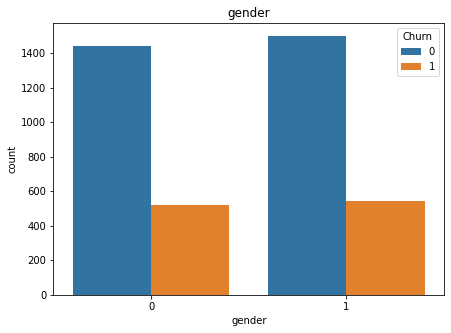

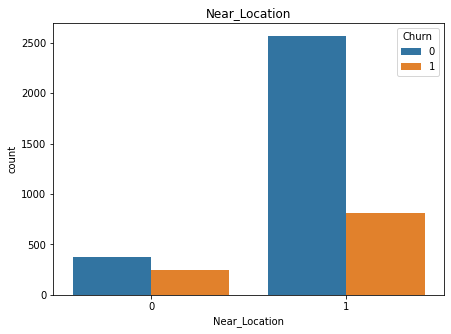

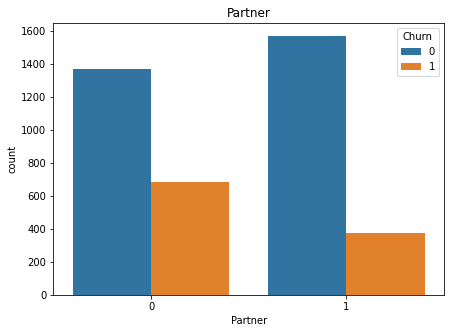

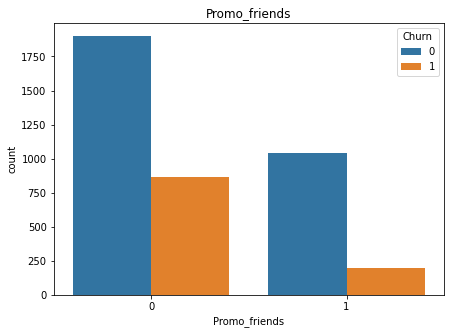

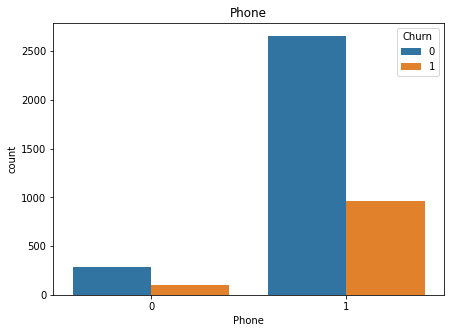

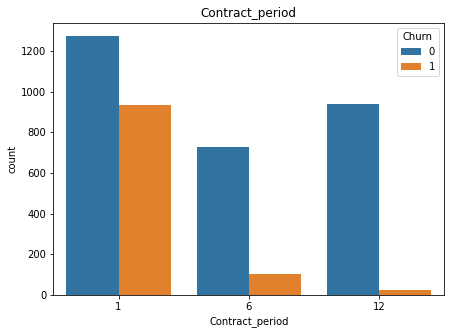

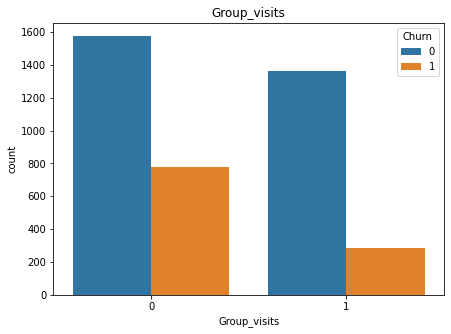

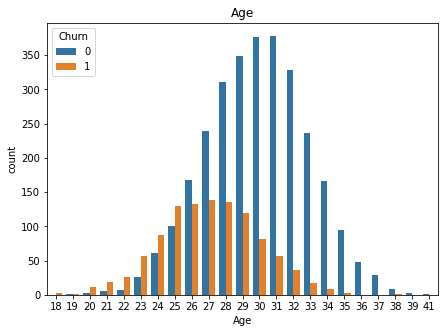

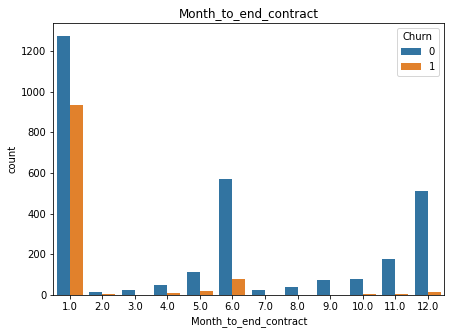

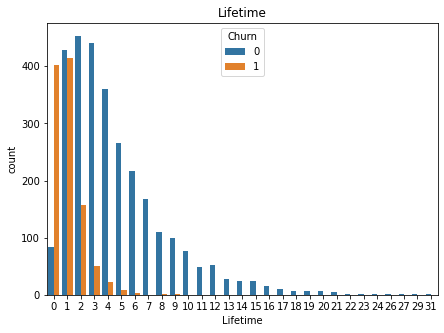

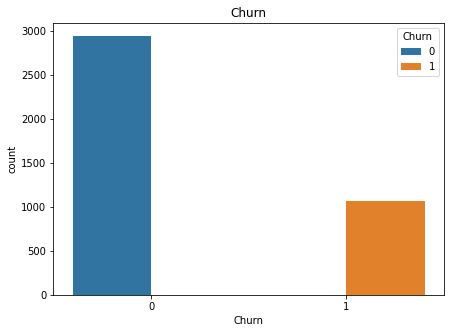

In [8]:
# создадим цикл, который построит гистограммы только для признаков
dont_show = ['Avg_class_frequency_current_month', 'Avg_class_frequency_total', 'Avg_additional_charges_total']
for i in data.columns:
    if i not in dont_show:
        plt.figure(figsize=(7,5))
        sns.countplot(x=data[i], hue='Churn', data=data)
        plt.title(i)
        plt.show()

<Figure size 720x576 with 0 Axes>

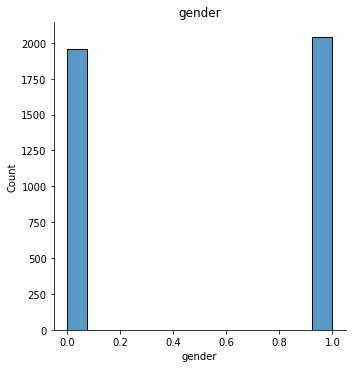

<Figure size 720x576 with 0 Axes>

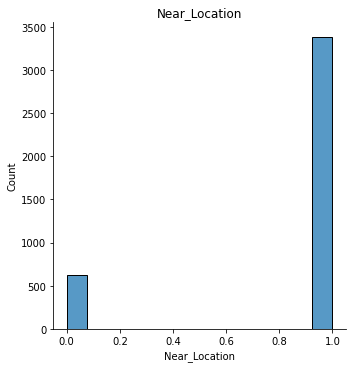

<Figure size 720x576 with 0 Axes>

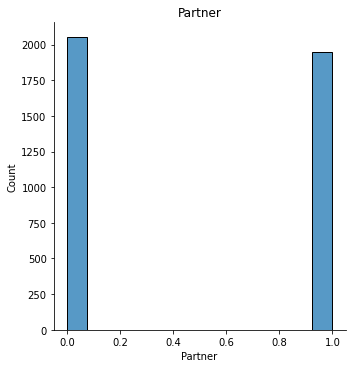

<Figure size 720x576 with 0 Axes>

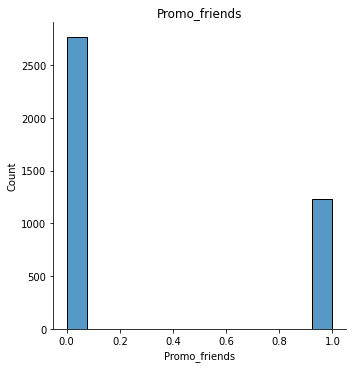

<Figure size 720x576 with 0 Axes>

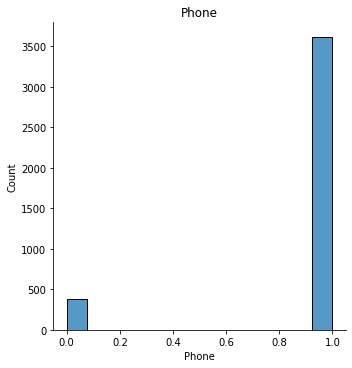

<Figure size 720x576 with 0 Axes>

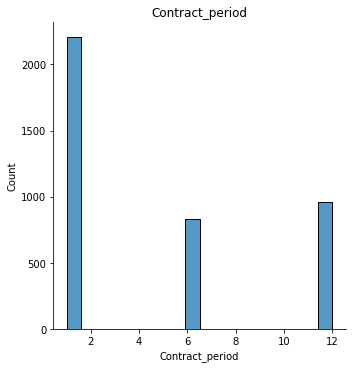

<Figure size 720x576 with 0 Axes>

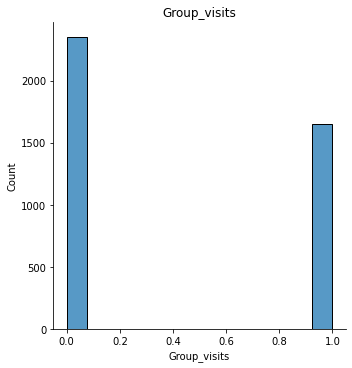

<Figure size 720x576 with 0 Axes>

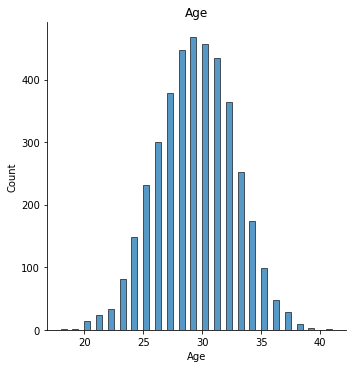

<Figure size 720x576 with 0 Axes>

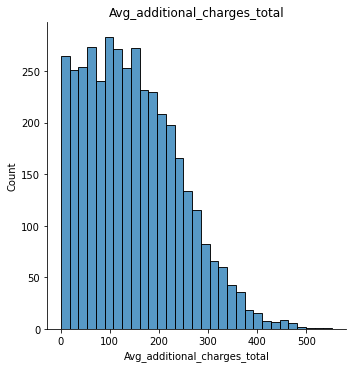

<Figure size 720x576 with 0 Axes>

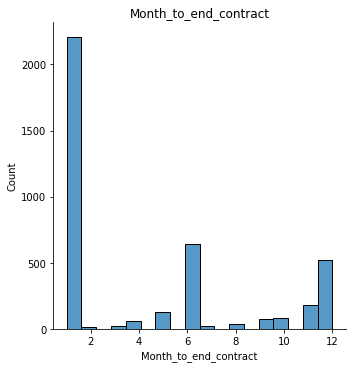

<Figure size 720x576 with 0 Axes>

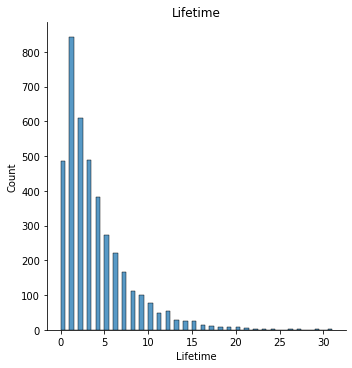

<Figure size 720x576 with 0 Axes>

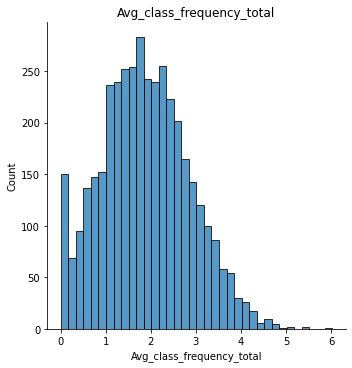

<Figure size 720x576 with 0 Axes>

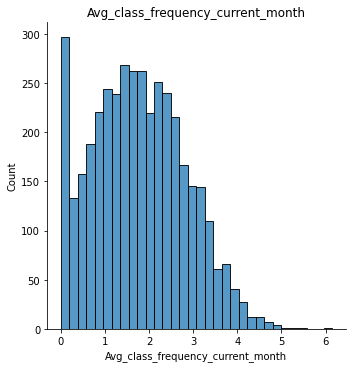

<Figure size 720x576 with 0 Axes>

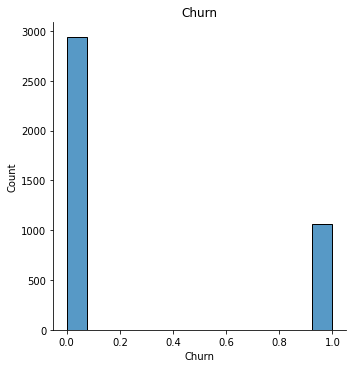

In [9]:
 for col in data.columns:
    plt.figure(figsize=(10,8))
    sns.displot(data[col])
    plt.title(col)
    plt.show()

Судя по средним значениям и стандартному отклонению можем сделать вывод, что большинство признаков нормально распределены. Каких-то явных ярких выбросов и перекосов по диаграммам рассеяния не наблюдается. 

#### Построим матрицу корреляции и отобразим ее

<AxesSubplot:>

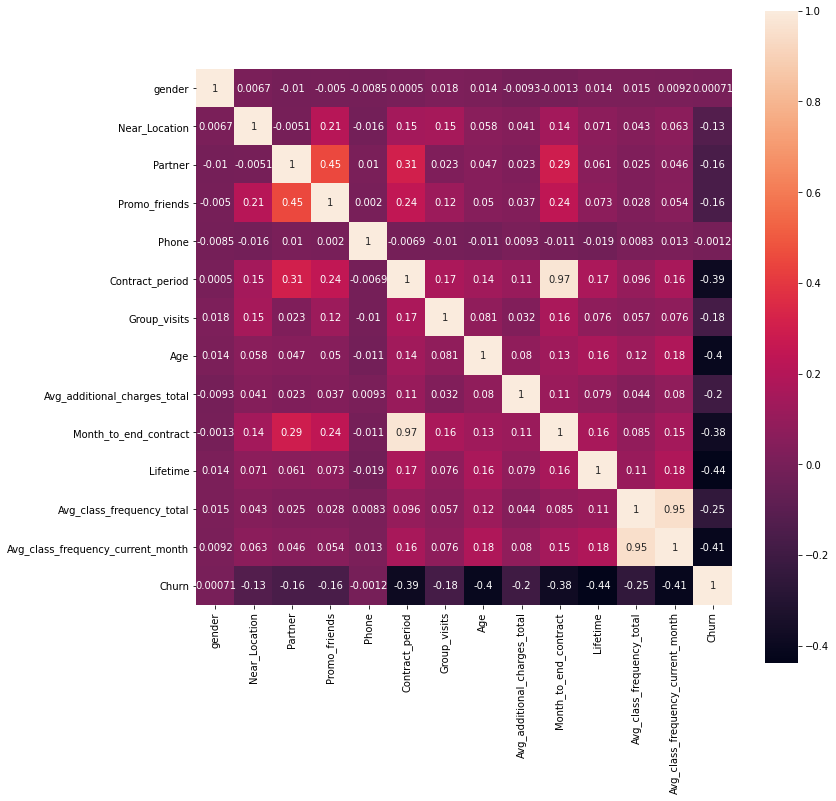

In [10]:
# расчитываем матрицу корреляций 
cm = data.corr()
# строим heatmap
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, square=True)

<AxesSubplot:>

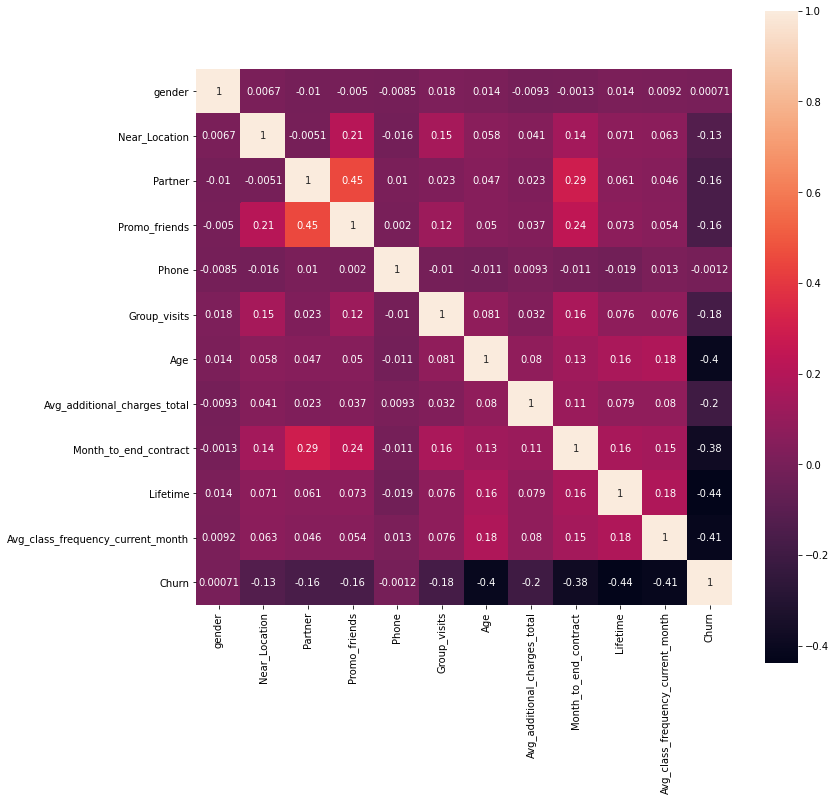

In [11]:
# удалим по одному из каждой пары сильно скоррелированных признаков
data = data.drop(columns=['Contract_period', 'Avg_class_frequency_total'])

# расчитываем матрицу корреляций 
cm = data.corr()
# строим heatmap
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, square=True)

Целевая переменная - Churn имеет значения 0 и 1 (0 - клиент остался, 1 - клиент ушел).
Остальные 13 колонок являются признаками. Также нужно сказать, что целевая переменная не имеет временную структуру.

На тепловой карте видим мультиколлинеарные признаки, это:

contract_period - month_to_end_contract
vg_class_frequency_current_month - avg_class_frequency_total

Также, можем сказать, что имеются признаки с нулевой корреляцией по отношению к целевой переменной: phone и genger

### Вывод

Проведя исследовательский анализ данных, можно сказать, что:
1) В датасете 4000 строк и 14 столбцов, пропусков и дубликатов нет. Присутствуют типы данных: float64(4) и int64(10).

2) По соотношению "остался" vs. "ушел" можно выделить следующие закономерности:

- соотношение мужчин и женщин примерно равно;
- больше ушло тех, кто не живет и не работает рядом с фитнесо-клубом;
- среди тех, кто пришел от партнеров, отток меньше;
- люди, которые ходят на групповые занятия, остаются чаще;
- среди возраста отток наблюдается у более молодой группы, хотя разница незначительна;
- те, кто уходит, меньше тратят на другие услуги фитнес-центра (кафе и тд.);
- отток наблюдается среди тех, у кого абонемент заканчивается в среднем через 1.6 месяца;
- отток начинает после 10 месяцев посещения.

3) Судя по средним значениям и стандартному отклонению можем сделать вывод, что большинство признаков нормально распределены. Каких-то явных ярких выбросов и перекосов по диаграммам рассеяния не наблюдается.

4) Целевая переменная - Churn имеет значения 0 и 1 (0 - клиент остался, 1 - клиент ушел).
Остальные 13 колонок являются признаками. Также нужно сказать, что целевая переменная не имеет временную структуру.

## Модель прогнозирования оттока клиентов

### Разделим данные на обучающую и валидационную выборку 

In [12]:
# разделим данные на признаки
X = data.drop(columns=['Churn']) # матрица Х
y = data['Churn'] # целевая переменная

In [13]:
# разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# посмотрим размеры
print(f"Размер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер тренировочной выборки: (3200, 11)
Размер тестовой выборки: (800, 11)


In [14]:
# нормализуем данные 
scaler = StandardScaler()
# преобразуем тестовые и валидационные выборки
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

### Обучим модель на train-выборке двумя способами

Обучение логистической регрессией

In [15]:
# алгоритм для модели
lr_model = LogisticRegression(random_state=0)
# обучаем модель
lr_model.fit(X_train_st, y_train)
# делаем прогнозы, воспользовавшись обученной моделью 
lr_predictions = lr_model.predict(X_test_st)

lr_probabilities = lr_model.predict_proba(X_test_st)

Обучение случайным лесом

In [16]:
# алгоритм для модели случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) # Ваш код здесь
# обучаем модель 
rf_model.fit(X_train_st, y_train)
# делаем прогноз, воспользовавшись обученной моделью
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]

### Метрики accuracy, precision и recall для обеих моделей на валидационной выборке

In [17]:
# напишем функцию для вывода всех метрик
# определим функцию, которая будет выводить все метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [18]:
# выводим метрики
print_all_metrics(y_test, lr_predictions, lr_probabilities, title = 'Метрики для модели  логистической регрессии')

print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели  логистической регрессии
	Accuracy: 0.91
	Precision: 0.80
	Recall: 0.82
Метрики для модели случайного леса:
	Accuracy: 0.91
	Precision: 0.82
	Recall: 0.78


### Вывод

В данном пункте мы провели разделение данных на обучающую и валидационную выборки и обучили модель двумя способами: логистической регрессией и случайным лесом.
Далее были посчитаны метрики accuracy, precision и recall для обеих моделей на валидационной выборке.
При этом выборки Accuracy и Precision не показали значительной разницы, выборка Recall ведет себя немного лучше в модели, обученной по логистической регрессии: 0.82 против 0.78.

## Кластеризация клиентов

### Стандартизируем данные, построим матрицу расстояний и нарисуем дендрограмму

In [19]:
# стандартизируепм данные
scaler = StandardScaler() # создаём объект класса scaler 
x_sc = scaler.fit_transform(data.drop(columns = ['Churn'])) 

In [ ]:
# строим матрицу расстояний на стандартизированной матрице признаков и нарисуем дендрограмму
linked = linkage(x_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма кластеризации клиентов фитнеса')
plt.show()

Можно выделить 4 кластера.

### Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов

In [21]:
# Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. за число кластеров примем n=5
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(x_sc)
data['cluster_km'] = labels
display(data.head())

,gender,Near_Location,Partner,Promo_friends,Phone,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_current_month,Churn,cluster_km
0,1,1,1,1,0,1,29,14.227470,5.0,3,0.000000,0,0
1,0,1,0,0,1,1,31,113.202938,12.0,7,1.910244,0,4
2,0,1,1,0,1,0,28,129.448479,1.0,2,1.736502,0,2
3,0,1,1,1,1,1,33,62.669863,12.0,2,3.357215,0,0
4,1,1,1,1,1,0,26,198.362265,1.0,3,1.120078,0,0


In [22]:
# посчитаем метрику силуэта для кластеризации
print('Silhouette_score: {:.2f}'.format(silhouette_score(x_sc, labels)))

Silhouette_score: 0.12


Метрика силуэта показывает, насколько объект своего кластера похож на свой кластер больше, чем на чужой. 
В данном случае значение метрики не слишком хорошее.

### Средние значения признаков для кластеров

In [23]:
# сгруппруем данные, посчитаем среднее и перевернем таблшицу
data_mean = data.groupby('cluster_km').mean().T
# переименуем столбцы
data_mean.columns = ['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']
# выводим получившуюся таблицу
display(data_mean)

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
gender,0.492000,0.495352,0.511194,0.502455,0.550481
Near_Location,0.994000,0.998672,1.000000,0.000000,0.998798
Partner,0.953000,0.378486,0.226368,0.489362,0.274038
Promo_friends,1.000000,0.046481,0.114428,0.072013,0.075721
Phone,0.906000,0.903054,0.899254,0.913257,0.897837
Group_visits,0.528000,0.000000,0.182836,0.232406,1.000000
Age,29.633000,30.342629,26.807214,28.700491,30.248798
Avg_additional_charges_total,154.086252,174.392898,111.073289,137.375245,155.206260
Month_to_end_contract,6.730000,4.698539,1.715174,2.826514,4.707933
Lifetime,4.287000,5.166003,1.420398,3.027823,4.483173


### Распределение признаков для кластеров

In [24]:
# преобразуем колонки в список
list_columns = data.columns.to_list()
display(list_columns)

['gender',
 'Near_Location',
 'Partner',
 'Promo_friends',
 'Phone',
 'Group_visits',
 'Age',
 'Avg_additional_charges_total',
 'Month_to_end_contract',
 'Lifetime',
 'Avg_class_frequency_current_month',
 'Churn',
 'cluster_km']

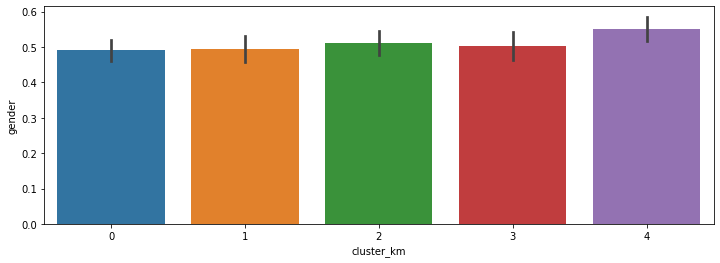

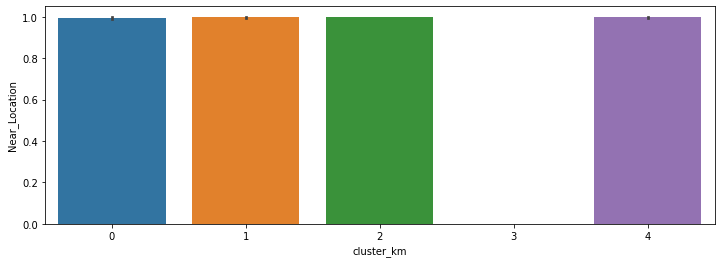

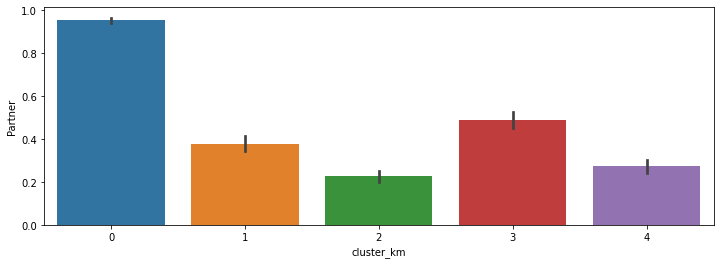

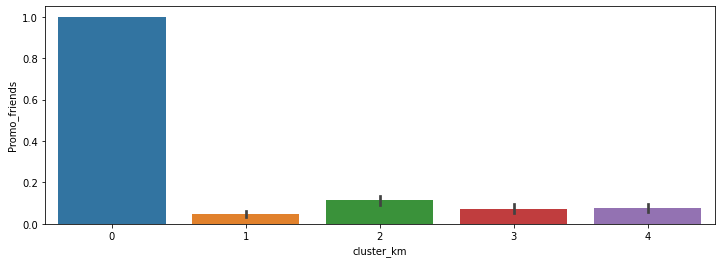

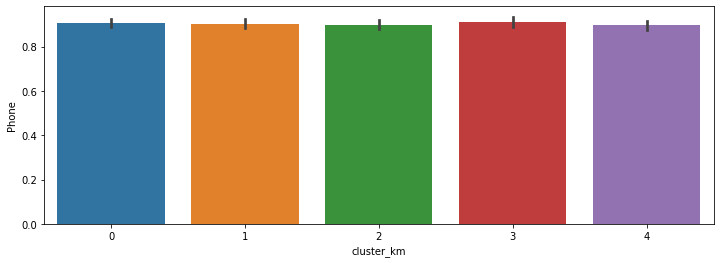

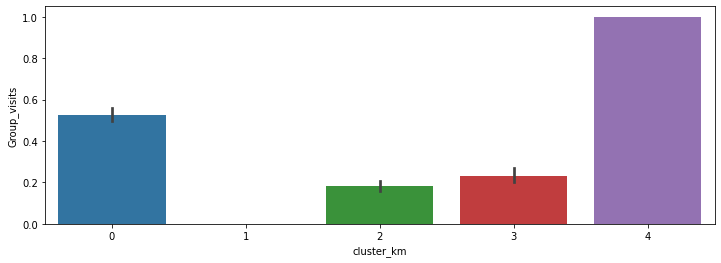

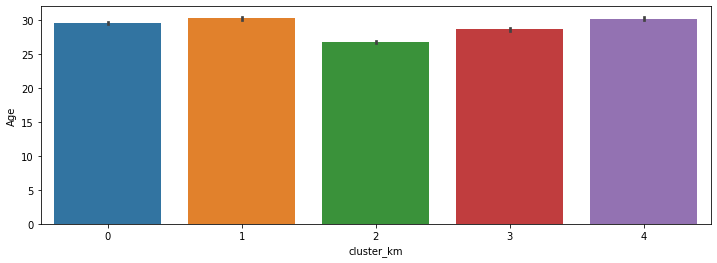

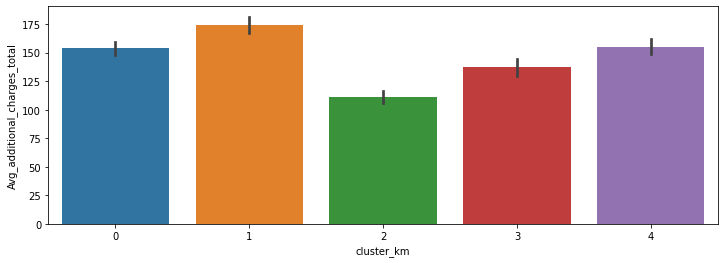

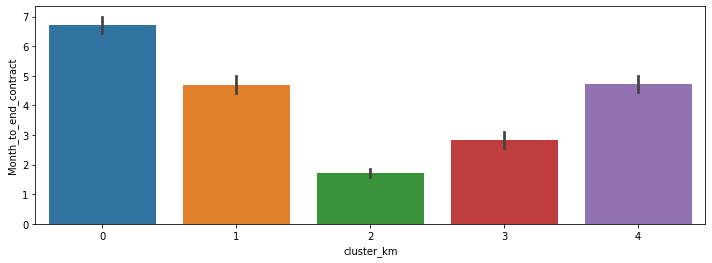

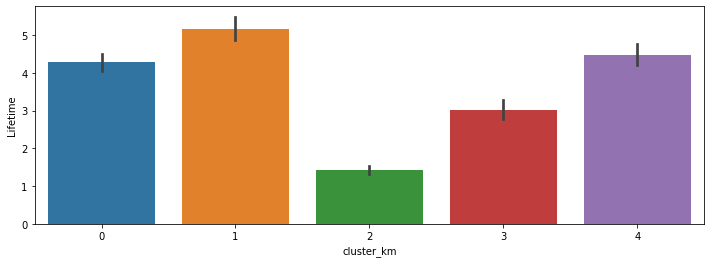

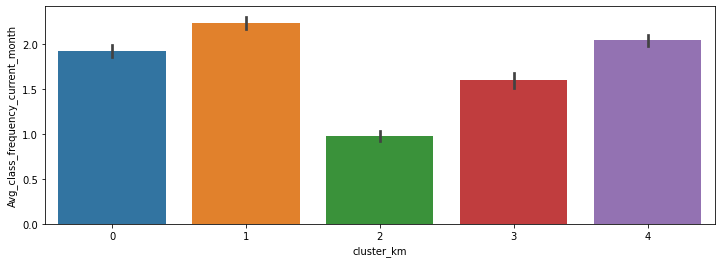

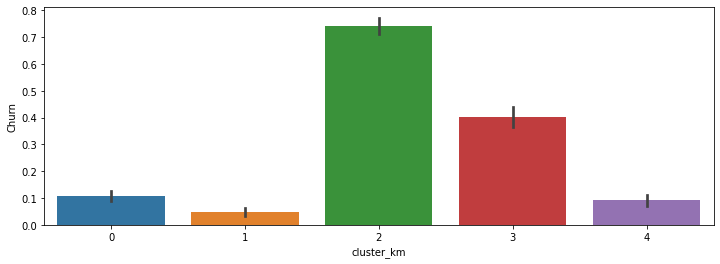

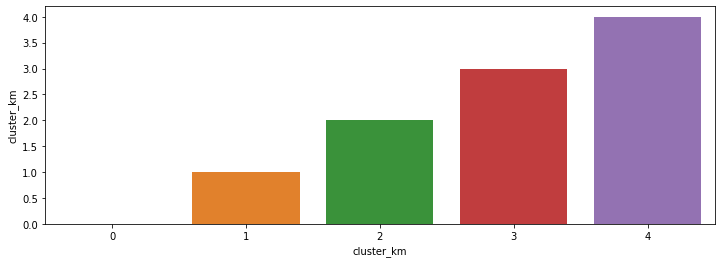

In [25]:
for col in list_columns:
    plt.figure(figsize=(12, 4))  
    sns.barplot(data=data, y=col, x='cluster_km');

### Доля оттока для каждого кластера

In [26]:
for i in range(0, 5):
    data_int = data.loc[data['cluster_km'] == i, ['Churn']]
    data_int_avg = round(data_int.loc[data_int['Churn'] == 1].shape[0]/data_int.shape[0]*100, 2)
    print('Доля оттока посетителей в кластере', i, '-', data_int_avg, '%')

Доля оттока посетителей в кластере 0 - 10.8 %
Доля оттока посетителей в кластере 1 - 4.65 %
Доля оттока посетителей в кластере 2 - 74.13 %
Доля оттока посетителей в кластере 3 - 40.1 %
Доля оттока посетителей в кластере 4 - 9.25 %


### Вывод

По итогам кластеризации можно сделать следующие выводы:
1) всего выделено 4 кластера

2) наибольший отток посителей в кластере 2 и 3:
- в них одна из самых низких посещаемостей групповых занятий
- наименьшая выручка по дополнительным услугам: кафе, спорттовары, косметический и массажный салон.
- в третьем кластере самое маленькое количество людей, которые живут рядом
- самое маленькие число посещений в неделю за прошлый месяц.

3) Самый лучший - кластер 1, далее 0 и 4.

## Общий вывод

На первом этапе анализа данные были выгружены, проверены на пропуски и дубликаты.
Далее был проведен исследовательский анализ данных (EDA) со следующими выводами:
1) В датасете 4000 строк и 14 столбцов, пропусков и дубликатов нет. Присутствуют типы данных: float64(4) и int64(10).

2) По соотношению "остался" vs. "ушел" можно выделить следующие закономерности:

соотношение мужчин и женщин примерно равно;
больше ушло тех, кто не живет и не работает рядом с фитнес-клубом;
среди тех, кто пришел от партнеров, отток меньше;
люди, которые ходят на групповые занятия, остаются чаще;
среди возраста отток наблюдается у более молодой группы, хотя разница незначительна;
те, кто уходит, меньше тратят на другие услуги фитнес-центра (кафе и тд.);
отток наблюдается среди тех, у кого абонемент заканчивается в среднем через 1.6 месяца;
отток начинает после 10 месяцев посещения.
3) Судя по средним значениям и стандартному отклонению можем сделать вывод, что большинство признаков нормально распределены. Каких-то явных ярких выбросов и перекосов по диаграммам рассеяния не наблюдается.

4) Целевая переменная - Churn имеет значения 0 и 1 (0 - клиент остался, 1 - клиент ушел). Остальные 13 колонок являются признаками. Также нужно сказать, что целевая переменная не имеет временную структуру.

Далее построли модель и обучили ее по логистической регрессии и случайным лесом. Далее были посчитаны метрики accuracy, precision и recall для обеих моделей на валидационной выборке.

Была проведена кластеризация клиентов:
1) всего выделено 4 кластера

2) наибольший отток посителей в кластере 2 и 3:
- в них одна из самых низких посещаемостей групповых занятий
- наименьшая выручка по дополнительным услугам: кафе, спорттовары, косметический и массажный салон.
- в третьем кластере самое маленькое количество людей, которые живут рядом
- самое маленькие число посещений в неделю за прошлый месяц.

3) Самый лучший - кластер 1, далее 0 и 4.

Рекомендации:
- проработать маркетинговые решения для клиентов, которые живут не рядом с фитнес-клубам,
- дальнейшее развитие сотрудничества с партнерами,
- необходимо провести анализ качества работы групповых занятий и дополнительных услуг.